In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Problem : Principal Component Analysis
**Principal component analysis** (PCA) is a technique of dimensionality reduction, which linearly maps data onto a lower-dimensional space, so that the variance of the projected data in the associated dimensions would be maximized. In this problem, you will perform PCA on a dataset of face images.

In [5]:
X_train, X_test = [], []
Y_train, Y_test = [], []
for i in range(1, 41):
    for j in range(1, 10):
        img = cv2.imread(f"./Unit08/data/{i}_{j}.png", cv2.IMREAD_GRAYSCALE)
        X_train.append(img)
        Y_train.append(i)
    img = cv2.imread(f"./Unit08/data/{i}_10.png", cv2.IMREAD_GRAYSCALE)
    X_test.append(img)
    Y_test.append(i)

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
print(f'X_train shape: {X_train.shape}\nY_train shape: {Y_train.shape}\nX_test shape: {X_test.shape}\nY_test shape: {Y_test.shape}')


X_train shape: (360, 56, 46)
Y_train shape: (360,)
X_test shape: (40, 56, 46)
Y_test shape: (40,)


## 1. mean face & first four eigenfaces

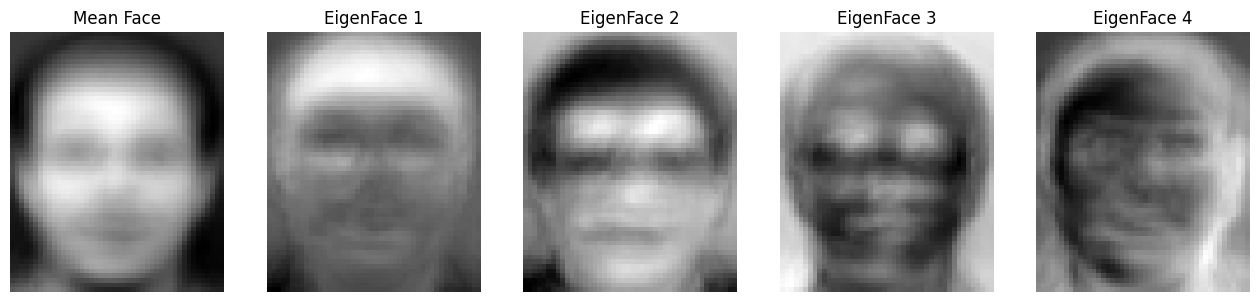

In [7]:
pca = PCA()
pca.fit(X_train.reshape(len(Y_train), -1  ))

plt.figure(figsize=(16,12))
plt.subplot(1, 5,1)
plt.axis('off')
plt.title("Mean Face")
plt.imshow(pca.mean_.reshape(X_train[0].shape), cmap='gray')

for i in range(4):
    plt.subplot(1, 5, i+2)
    plt.axis('off')
    plt.title(f"EigenFace {i+1}")
    plt.imshow(pca.components_[i].reshape(X_train[0].shape), cmap="gray")

plt.show()

## 2. Reconstruct person2 image1 using the first n = 3, 50, 170, 240, 345 eigenfaces
## 3. compute the mean squared error

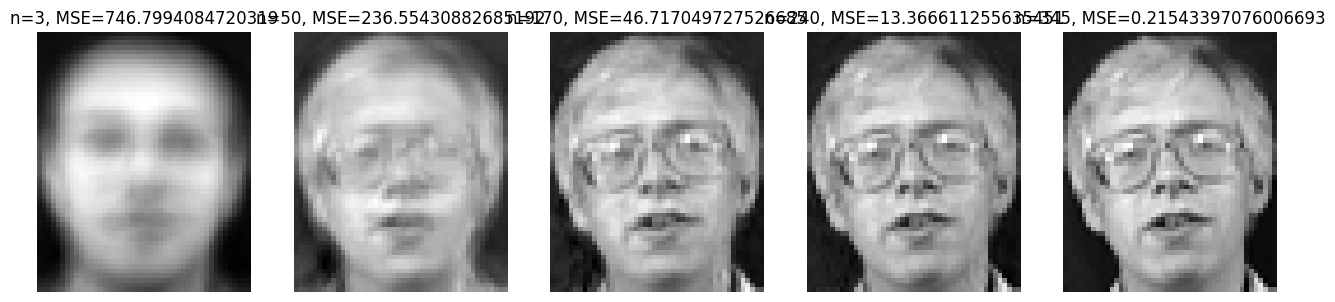

In [9]:
img = cv2.imread(f"./Unit08/data/2_1.png", cv2.IMREAD_GRAYSCALE).reshape(1, -1)
a = pca.transform(img)

plt.figure(figsize=(16,12))
n_components = [3, 50, 170, 240, 345]
for i, n in enumerate(n_components):
    face = np.zeros(img.shape)
    for j in range(n):
        face = face + a[0][j]*pca.components_[j]
    face = face+pca.mean_
    MSE = np.mean((face-img)**2)
    plt.subplot(1, 5, i+1)
    plt.axis("off")
    plt.title(f"n={n}, MSE={MSE}")
    plt.imshow(face.reshape(X_train[0].shape), cmap='gray')

## 4. cross-validation results

In [11]:
reduced_X_train = pca.transform(X_train.reshape(len(Y_train), -1))
K = [1, 3, 5]
N = [3, 50, 170]
random = np.random.permutation(len(Y_train))
reduced_X_train = reduced_X_train[random]
Y_train_random = Y_train[random]
for k in K:
    print(f'k={k}')
    knn = KNeighborsClassifier(n_neighbors=k)
    for n in N:
        print(f'n={n}')
        score = cross_val_score(knn, reduced_X_train[:, :n], Y_train_random, cv=3)
        print(f'score: {score.mean():4f}')

k=1
n=3
score: 0.725000
n=50
score: 0.966667
n=170
score: 0.966667
k=3
n=3
score: 0.644444
n=50
score: 0.919444
n=170
score: 0.913889
k=5
n=3
score: 0.550000
n=50
score: 0.861111
n=170
score: 0.847222


## 5. recognition rate of the testing set

In [12]:
k=1
n = 50


reduced_X_test = pca.transform(X_test.reshape(len(Y_test), -1))
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(reduced_X_train[:, :n], Y_train_random)
print(f"accuracy: {knn.score(reduced_X_test[:, :n], Y_test)}")

accuracy: 0.925
